In [135]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [136]:
data=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [137]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [138]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1    165
0    138
Name: target, dtype: int64


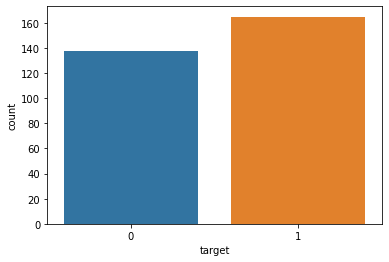

In [140]:
print(data.loc[:,"target"].value_counts())
sns.countplot(data["target"])

In [141]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# Logistic Regression

Logistic regression algoritması bir classification yani sınıflandırma algoritmasıdır.

In [142]:
x_data=data.drop(["target"],axis=1)
y=data["target"].values

In [143]:
x_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [144]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [145]:
# Normalization

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [146]:
# Train,test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [147]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x,y) # Modelimizi eğitiriz.

LogisticRegression()

In [148]:
print("Train Accuracy: {}".format(lr.score(x_train,y_train)))
print("Test Accuracy: {}".format(lr.score(x_test,y_test)))

Train Accuracy: 0.8305785123966942
Test Accuracy: 0.8688524590163934


In [149]:
list_1=[]
list_2=[]

list_1.append("LogisticRegression")
list_2.append(lr.score(x_test,y_test)*100)

# KNN Classification

In [150]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [151]:
print("Train Accuracy: {}".format(knn.score(x_train,y_train)))
print("Test Accuracy: {}".format(knn.score(x_test,y_test)))

Train Accuracy: 0.8471074380165289
Test Accuracy: 0.819672131147541


Test: 0.8032786885245902
Test: 0.7377049180327869
Test: 0.8360655737704918
Test: 0.7704918032786885
Test: 0.819672131147541
Test: 0.819672131147541
Test: 0.819672131147541
Test: 0.8032786885245902
Test: 0.819672131147541
Test: 0.819672131147541
Test: 0.819672131147541
Test: 0.8360655737704918
Test: 0.8032786885245902
Test: 0.819672131147541


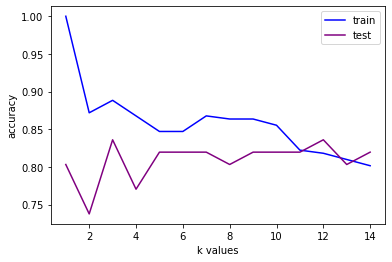

In [152]:
# Yukarıda k=6 için accuracy değeri bulduk. Peki diğer k değerlerinde accuracy ne çıkacak ? Daha iyi bir accuracy değeri bulabiliriz.

score_test=[]
score_train=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    print("Test: {}".format(knn2.score(x_test,y_test)))
    score_test.append(knn2.score(x_test,y_test))
    score_train.append(knn2.score(x_train,y_train))
    
plt.plot(range(1,15),score_train,color="blue",label="train")
plt.plot(range(1,15),score_test,color="purple",label="test")
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Grafikte test k=3 değerinde en yüksek accuracye ulaştığımızı görüyoruz.

In [153]:
list_1.append("KNN")
list_2.append(knn.score(x_test,y_test)*100)

# Support Vector Machine Classification

In [154]:
# SVM

from sklearn.svm import SVC

svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [155]:
print("Train Accuracy: {}".format(svm.score(x_train,y_train)))
print("Test Accuracy: {}".format(svm.score(x_test,y_test)))

Train Accuracy: 0.8842975206611571
Test Accuracy: 0.8360655737704918


In [156]:
list_1.append("SVM")
list_2.append(svm.score(x_test,y_test)*100)

# Naive Bayes Classification

In [157]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [158]:
print("Train Accuracy: {}".format(nb.score(x_train,y_train)))
print("Test Accuracy: {}".format(nb.score(x_test,y_test)))

Train Accuracy: 0.8181818181818182
Test Accuracy: 0.8688524590163934


In [159]:
list_1.append("NaiveBayes")
list_2.append(nb.score(x_test,y_test)*100)

# Decision Tree Classification

In [160]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [161]:
print("Train Accuracy: {}".format(dt.score(x_train,y_train)))
print("Test Accuracy: {}".format(dt.score(x_test,y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8032786885245902


In [162]:
list_1.append("DecisionTree")
list_2.append(dt.score(x_test,y_test)*100)

# Random Forest Classification

In [163]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100) # n_estimators ile kaç tane ağaç kullanacağımızı belirtiriz.
rf.fit(x_train,y_train)

RandomForestClassifier()

In [164]:
print("Train Accuracy: {}".format(rf.score(x_train,y_train)))
print("Test Accuracy: {}".format(rf.score(x_test,y_test)))

Train Accuracy: 1.0
Test Accuracy: 0.8688524590163934


In [165]:
list_1.append("RandomForest")
list_2.append(rf.score(x_test,y_test)*100)

Classification modellerimizi oluşturup accuracy değerlerimizi bulduk.

In [166]:
list_1

['LogisticRegression',
 'KNN',
 'SVM',
 'NaiveBayes',
 'DecisionTree',
 'RandomForest']

In [167]:
list_2

[86.88524590163934,
 81.9672131147541,
 83.60655737704919,
 86.88524590163934,
 80.32786885245902,
 86.88524590163934]

Listelerin ilkinde classification modellerinin isimlerini diğerinde accuracy değerlerini tuttuk. Şimdi bunları tabloda gösterelim.

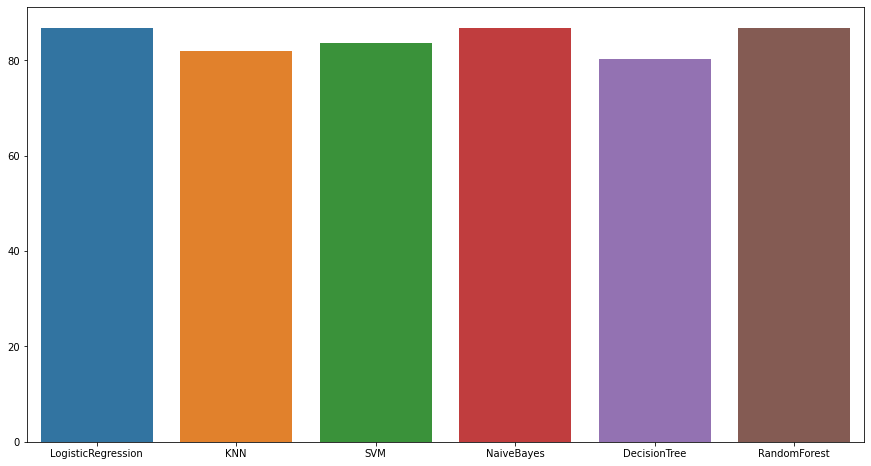

In [171]:
plt.figure(figsize=(15,8))
sns.barplot(x=list_1,y=list_2)
plt.show()